In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data.head()
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 將資料進行清洗，雖然資料看似完整，但為了能確保無誤，還是有將資料清洗過後再進行使用

In [3]:
def createDateset(filename):
    with open(filename, 'r')as csvfile:
        dataset= [line.strip().split(', ') for line in csvfile.readlines()]     #讀取檔案中的每一行
        dataset=[[int(i) if i.isdigit() else i for i in row] for row in dataset]    #對於每一行中的每一個元素，將行列式數字化並且去除空白保證匹配的正確完成
        cleanoutdata(dataset)   #清洗資料
        del (dataset[-1])       #去除最後一行的空行
        #precondition(dataset)   #預處理資料
        labels=['age','workclass','fnlwgt','education','education-num',
                'marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                'native-country']
        labelType = ['continuous', 'uncontinuous', 'continuous',
                     'uncontinuous',
                     'continuous', 'uncontinuous',
                     'uncontinuous', 'uncontinuous', 'uncontinuous',
                     'uncontinuous', 'continuous', 'continuous',
                     'continuous', 'uncontinuous']

        return dataset,labels,labelType

def cleanoutdata(dataset):#資料清洗
    for row in dataset:
        for column in row:
            if column == '?' or column=='':
                dataset.remove(row)
                break

# 資料前處理

### 本資料集的數據經探勘之後，發現並無缺失值，所以此類方法是不適用於此資料集的。不過因為有數值型、二元型和類別型資料之分，我會使用多種方法個別處理資料之後，根據資料通過機器學習方法，來比較各種處理方式後，測試資料集對Model的準確率，以下是我會使用的方法:
### 1.Label Encoder
### 2.One Hot Encoder


# 1.Label Encoder:把每個類別 mapping 到某個整數，不會增加新欄位

### 是用來對分類型特徵值進行編碼，即對不連續的數值或文本進行編碼，以此資料集為例，因為機器學習中的model 是沒辦法讀取文字的，所以對於類別型資料和二元型資料可以進行數字編碼，但是有些資料無法直接被機器學習的model當成訓練資料，因為是文字資料，所以可以按不同種類，將此資料進行分類，利用sklearn.preprocessing套件庫裡的labal encoder方法進行編碼，將之轉換成0、1、2....

#### 將workclass進行分類

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
le = LabelEncoder()
le.fit(data['workclass'].tolist())
data['workclass'] = le.transform(data['workclass'].tolist())
data['workclass']

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name: workclass, Length: 32561, dtype: int64

In [5]:
le.fit(data['education'].tolist())
data['education'] = le.transform(data['education'].tolist())
data['education']
le.fit(data['marital-status'].tolist())
data['marital-status'] = le.transform(data['marital-status'].tolist())
data['marital-status']
le.fit(data['occupation'].tolist())
data['occupation'] = le.transform(data['occupation'].tolist())
data['occupation']
le.fit(data['relationship'].tolist())
data['relationship'] = le.transform(data['relationship'].tolist())
data['relationship']
le.fit(data['race'].tolist())
data['race'] = le.transform(data['race'].tolist())
data['race']
le.fit(data['sex'].tolist())
data['sex'] = le.transform(data['sex'].tolist())
data['sex']
le.fit(data['native-country'].tolist())
data['native-country'] = le.transform(data['native-country'].tolist())
data['native-country']
le.fit(data['salary'].tolist())
data['salary'] = le.transform(data['salary'].tolist())
data['salary']
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [6]:
data.dtypes #檢查是否都為INT

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
salary            int64
dtype: object

# One hot encoder:為每個類別新增一個欄位，用 0/1 表示是否

### 編碼邏輯為將類別拆成多個Column，每個列中的數值由1、0替代，當某一列的資料存在的該行的類別則顯示1，反則顯示0。然而，在指定column進行編碼的情形下，One hot encoding無法直接對字串進行編碼，必須先透過Label encoding將字串以數字取代後再進行One hot encoding處理。

#### 因為已經進行Label Encoder，所以將 One Hot Encoder ，放上註記做為參考。

In [7]:
#data.columns[:-1]
#datas = pd.get_dummies(data.drop(['salary'],axis=1)).astype(int)
#datas

### 首先，將原數據集按特徵和目標進行分割：
#### 建立特徵X，與目標y

In [8]:
Y = data['salary']
X = data.drop(['salary'],axis=1)

## 拆分訓練集與測試集

#### 指定了拆分係數為0.3，也是說將7/10的數據作為訓練集，剩下3/10的數據作為測試集。在這裡我們指定了拆分係數為0.3，也是說將7/10的數據作為訓練集，剩下3/10的數據作為測試集。

In [9]:
from sklearn.model_selection import train_test_split
col_names = ["age", "workclass", "education", "education-num", "marital-status", "occupation", 
             "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [10]:
(X_train.shape,X_test.shape)

((22792, 14), (9769, 14))

In [11]:
from sklearn.feature_extraction import DictVectorizer
dict_vect=DictVectorizer(sparse=False)
X_train=dict_vect.fit_transform(X_train.to_dict(orient='record'))
dict_vect.feature_names_
X_test=dict_vect.transform(X_test.to_dict(orient='record'))

### 開始建模，並使用X_train,和Y_train進行數據訓練：
#### 查看一下在測試集上的準確度（將經過訓練集訓練後的模型，應用到測試集裡，並查看擬合的得分情況）

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train,Y_train)

### 將訓練集能100%訓練出來

In [13]:
score = clf.score(X_train, Y_train) 
print('Accuracy on train data is %.2f' % (score))

Accuracy on train data is 1.00


### 將剩下30%的X資料，預測出來的結果

In [14]:
pre=clf.predict(X_test)
pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### 預測結果進行評分看準確率為多少

In [15]:
clf.score(X_test,Y_test)

0.8163578667212611

# 交叉驗證

### 交叉驗證在機器學習上通常是用來驗證「你設計出來模型」的好壞。

## Cross validation approach

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(clf, X, Y, cv=3)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))
scores

Accuracy : 0.81 (+/- 0.00)


array([0.81306431, 0.80799705, 0.81737768])

## K-Folds cross-validator: 
### 將其中 K-1 的資料當作訓練集，剩下來的那份做為驗證集，算出一個 Validation Error，接著再從沒當過驗證集的資料挑一份出來當驗證集，剛剛做過驗證集的資料則加回訓練集，維持 K-1 份做訓練、1 份做驗證，如此反覆直到每一份資料都當過驗證集，這樣會執行 K 次，算出 K 個 Validation Error，最後我們再將這 K 個 Validation Error 做平均，用他們的平均分數來做為我們評斷模型好壞的指標。

In [17]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=3, shuffle=True, random_state=None)

accuracy = []
# Split the data set into training and testing
for train_index, test_index in kf.split(X,Y):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test, clf.predict(X_test)))

acc = np.asarray(accuracy)
print("Accuracy: ", acc.mean(), acc.std())

Accuracy:  0.8110349063363701 0.000442265717979188


### StratifiedKFold用法類似Kfold，但是他是分層採樣，確保訓練集，測試集中各類別樣本的比例與原始數據集中相同
#### 實際當中，我們只進行一次驗證還是不夠的，我們需要進行多次，所以我用RepeatedStratifiedKFold&RepeatedKFold，進行多次測試。

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
# 定義模型
model = DecisionTreeClassifier()

# define evaluation
# Repeats Stratified K-Fold n times with different randomization in each repetition.
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=1) 
rkf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

# define search space
# For parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
space = dict()
space['max_leaf_nodes'] = list(range(2, 100))
space['min_samples_split'] = [2, 3, 4, 5, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
SH = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=rkf)
# execute search
result = search.fit(X, Y)
RS= SH.fit(X, Y)
# summarize result
print('Best Score byK-Fold: %s' % result.best_score_)
print('Best Score by Stratified K-Fold: %s' % RS.best_score_)
print('Best Hyperparameters by K-Fold: %s' % result.best_params_)
print('Best Hyperparameters by Stratified K-Fold: %s' % RS.best_params_)

Best Score byK-Fold: 0.8565983691139646
Best Score by Stratified K-Fold: 0.8549338157319084
Best Hyperparameters by K-Fold: {'max_leaf_nodes': 82, 'min_samples_split': 5}
Best Hyperparameters by Stratified K-Fold: {'max_leaf_nodes': 58, 'min_samples_split': 4}


## 利用迴圈方式結合DecisionTree或KNeighbors，先找出最大準確率與Maxdepths(最佳深度解析參數)

### DecisionTree : 此方法運用以迴圈的方式，調整depth的參數從1~50找到最佳深度解析參數，將1到50全部跑過一遍，再利用matplotlib.pyplot套件繪圖，再從中找到測試資料的最大準確率

train data accuracy = 0.999956124956125
test data max accuracy = 0.8135940219060293


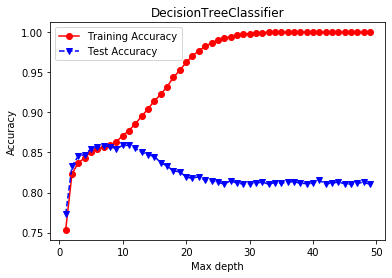

In [19]:
#decision tree with label encoder
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [i for i in range(1,50)]


trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('DecisionTreeClassifier')
print('train data accuracy = %s'%(trainAcc[36]))
print('test data max accuracy = %s'%(testAcc[36]))

### KNeighbors : 此方法運用以迴圈的方式，調整depth的參數從1~50找到最佳深度解析參數，將1到50全部跑過一遍，再利用matplotlib.pyplot套件繪圖，再從中找到測試資料的最大準確率

train data accuracy = 0.7941821691821692
test data max accuracy = 0.8083734261439247


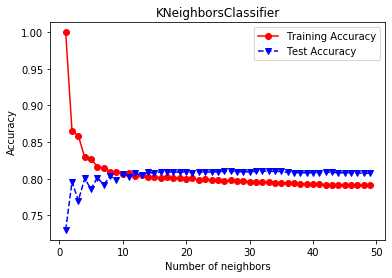

In [20]:
#knn classifier with label encoder
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

numNeighbors = [i for i in range(1,50)]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNeighborsClassifier')
print('train data accuracy = %s'%(trainAcc[36]))
print('test data max accuracy = %s'%(testAcc[36]))

### 下面使用GridSearchCV對決策樹進行調參並返回最佳參數。

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree_params = {'max_depth': range(3, 14)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)

locally_best_tree.fit(X_train, Y_train)
print("最佳深度解析參數：{}".format(locally_best_tree.best_params_))
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=6, random_state=17)
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test) 
print("最佳深度解析參數的情况：{}".format(score))

最佳深度解析參數：{'max_depth': 7}
最佳深度解析參數的情况：0.8506500153546934


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = DecisionTreeClassifier()

# define evaluation
# Repeats Stratified K-Fold n times with different randomization in each repetition.
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1) 


# define search space
# For parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
space = dict()
space['max_leaf_nodes'] = list(range(2, 100))
space['min_samples_split'] = [2, 3, 4, 5, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, Y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8567918710744005
Best Hyperparameters: {'max_leaf_nodes': 58, 'min_samples_split': 2}


In [23]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
import graphviz

#建立 Dot Data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(X.columns.values), 
                                class_names=['>50K', '<=50K'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#從 DOT data 建立 Graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())
#儲存決策樹
graph.write_png("adult.png")

True

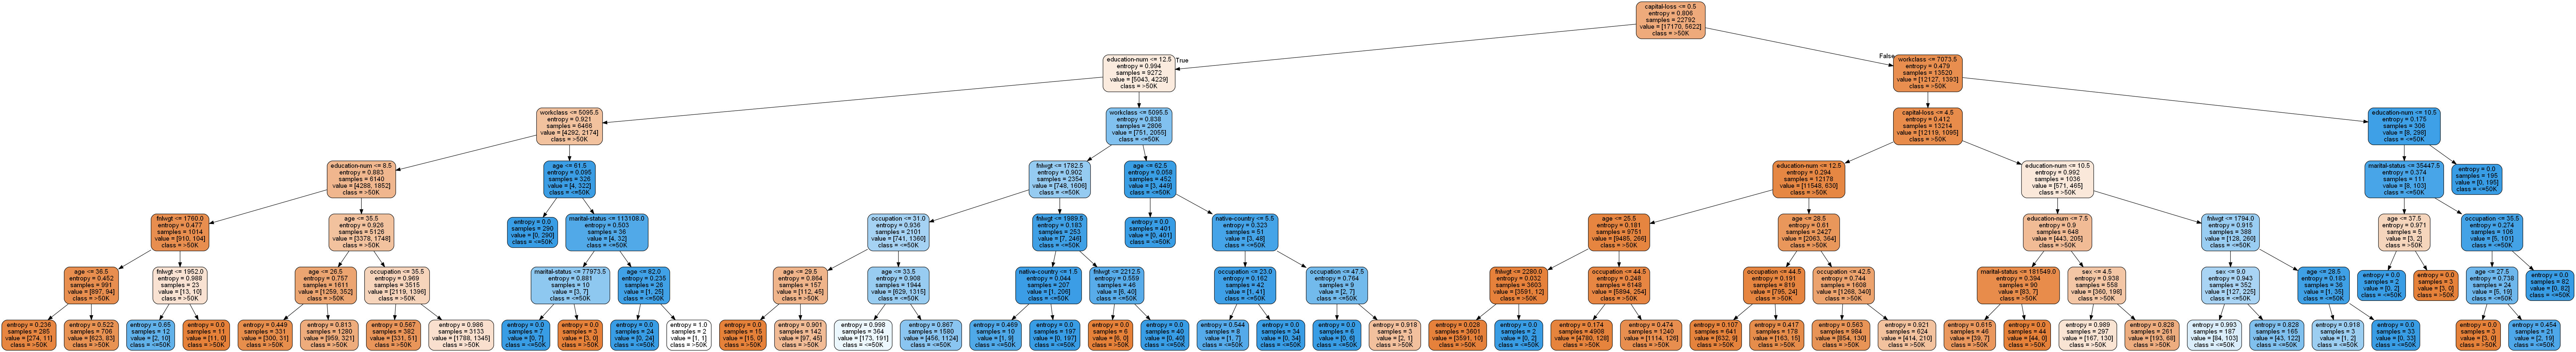

In [24]:
features = list(data.columns[:14])
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
import graphviz 
dot_data = tree.export_graphviz(clf ,  feature_names = features , class_names=[">50K","<=50K"]
                    ,filled=True,rounded=True,out_file = None)
graph =pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

#### 發現讓決策樹完整配置後，訓練後的準確率為100%，而測試的準確率為82%，之後運用GridSearchCV對決策樹進行調參並返回最佳參數，發現{最佳Depth: 7}，訓練後的準確率為100%，而測試的準確率為85%，我運用了三種交叉驗證:1.Cross validation approach 2.K-Folds cross-validator 3.StratifiedKFold cross-validator，把數據集拆成訓練集和驗證集，就是要度量模型對新數據的泛化能力。畢竟我們最終的目的是應用這個訓練好的模型來做分析、預測，所以我們對模型在訓練集上的擬合的好不好並不感興趣，而是想知道模型對於訓練過程中沒見過數據的預測能力。在少量樣本的狀況下，你從當中抽出來的那一小部分驗證集資料，那些樣本資料通常已經不具代表性，所以你可能會抽到某些資料驗證出來覺得模型訓練得還不錯，但換抽另一批資料來驗證就又覺得模型訓練的很糟糕。而為了避免這個狀況，可以比較有效的來評估模型的好壞，這時候我們就會採用交叉驗證的方法來做驗證，發現評分出來的準確都為85%。